In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import time
import pickle
from mlxtend.frequent_patterns import fpgrowth

In [3]:
#Read product names and IDs
lines=open("products.txt", "rt", encoding="utf8").readlines()
products=[0]*len(lines)
for lin in lines[1:]:
    pid, pname, aid, did=lin.strip().split("\t")    
    products[int(pid)]=pname

del products[0] #because for some reason the products list contains a 0 as the first element
products

['Chocolate Sandwich Cookies',
 'All-Seasons Salt',
 'Robust Golden Unsweetened Oolong Tea',
 'Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce',
 'Green Chile Anytime Sauce',
 'Dry Nose Oil',
 'Pure Coconut Water With Orange',
 "Cut Russet Potatoes Steam N' Mash",
 'Light Strawberry Blueberry Yogurt',
 'Sparkling Orange Juice & Prickly Pear Beverage',
 'Peach Mango Juice',
 'Chocolate Fudge Layer Cake',
 'Saline Nasal Mist',
 'Fresh Scent Dishwasher Cleaner',
 'Overnight Diapers Size 6',
 'Mint Chocolate Flavored Syrup',
 'Rendered Duck Fat',
 'Pizza for One Suprema  Frozen Pizza',
 'Gluten Free Quinoa Three Cheese & Mushroom Blend',
 'Pomegranate Cranberry & Aloe Vera Enrich Drink',
 'Small & Medium Dental Dog Treats',
 'Fresh Breath Oral Rinse Mild Mint',
 'Organic Turkey Burgers',
 'Tri-Vi-Sol® Vitamins A-C-and D Supplement Drops for Infants',
 'Salted Caramel Lean Protein & Fiber Bar',
 'Fancy Feast Trout Feast Flaked Wet Cat Food',
 'Complete Spring Water Foaming

In [8]:
#read transactions
import pickle
orders=pickle.load(open("order_products.pickle", "rb"))
orders

In [26]:
#check products on order 2:
for prod in orders[2]: print(products[prod])

In [16]:
# Convert the transaction data into a list of lists
orders_list = [list(order) for order in orders.values()]
orders_list

[[33120, 28985, 9327, 45918, 30035, 17794, 40141, 1819, 43668],
 [33754, 24838, 17704, 21903, 17668, 46667, 17461, 32665],
 [46842,
  26434,
  39758,
  27761,
  10054,
  21351,
  22598,
  34862,
  40285,
  17616,
  25146,
  32645,
  41276],
 [13176,
  15005,
  47329,
  27966,
  23909,
  48370,
  13245,
  9633,
  27360,
  6348,
  40878,
  6184,
  48002,
  20914,
  37011,
  12962,
  45698,
  24773,
  18569,
  41176,
  48366,
  47209,
  46522,
  38693,
  48825,
  8479],
 [40462, 15873, 41897],
 [34050, 46802],
 [23423],
 [21405,
  47890,
  11182,
  2014,
  29193,
  34203,
  14992,
  31506,
  23288,
  44533,
  18362,
  27366,
  432,
  3990,
  14183],
 [24852,
  4796,
  31717,
  47766,
  4605,
  1529,
  21137,
  22122,
  34134,
  27156,
  14992,
  49235,
  26842,
  3464,
  25720],
 [30162, 27085, 5994, 1313, 31506],
 [30597,
  15221,
  43772,
  37886,
  37215,
  34335,
  3164,
  26910,
  38888,
  38050,
  25213,
  11175,
  23390,
  29471,
  43511],
 [17330,
  27407,
  35419,
  196,
  44635,

In [17]:
# Encode the transaction data as a binary matrix
te = TransactionEncoder()
te_ary = te.fit_transform(orders_list, sparse=True)

df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)
df

,1,2,3,4,5,6,7,8,9,10,...,49679,49680,49681,49682,49683,49684,49685,49686,49687,49688
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Create a dictionary to map product IDs to names
id_to_name = {i: products[i] for i in range(len(products))}

# Rename the columns using the ID-to-name dictionary
df = df.rename(columns=id_to_name)

,All-Seasons Salt,Robust Golden Unsweetened Oolong Tea,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,Green Chile Anytime Sauce,Dry Nose Oil,Pure Coconut Water With Orange,Cut Russet Potatoes Steam N' Mash,Light Strawberry Blueberry Yogurt,Sparkling Orange Juice & Prickly Pear Beverage,Peach Mango Juice,...,All Natural Creamy Caesar Dressing,Spaghetti with Meatballs and Sauce Meal,California Limeade,Cucumber Kirby,"""Vodka, Triple Distilled, Twist of Vanilla""",En Croute Roast Hazelnut Cranberry,Artisan Baguette,Smartblend Healthy Metabolism Dry Cat Food,Fresh Foaming Cleanser,49688
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Remove the last column of the dataframe (for some reason it had a product with no identifiable name - 49678)
df = df.drop(df.columns[-1], axis=1)
df

,All-Seasons Salt,Robust Golden Unsweetened Oolong Tea,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,Green Chile Anytime Sauce,Dry Nose Oil,Pure Coconut Water With Orange,Cut Russet Potatoes Steam N' Mash,Light Strawberry Blueberry Yogurt,Sparkling Orange Juice & Prickly Pear Beverage,Peach Mango Juice,...,Famous Chocolate Wafers,All Natural Creamy Caesar Dressing,Spaghetti with Meatballs and Sauce Meal,California Limeade,Cucumber Kirby,"""Vodka, Triple Distilled, Twist of Vanilla""",En Croute Roast Hazelnut Cranberry,Artisan Baguette,Smartblend Healthy Metabolism Dry Cat Food,Fresh Foaming Cleanser
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3214872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
import time
from PD_freqitems import freqitemsets


#eliminated ECLAT from this function because I got an error 
#(I think I need to download something first but didn't understand exactly how (see class tutorial))
D={"threshold": [0.2, 0.1, 0.05, 0.02, 0.015],
   "num_itemsets":[],
   "apriori":[], 
   "FP-growth":[], 
   "PD":[]}

for min_supp in D["threshold"]:
    t0 = time.time()
    FI_apriori=apriori(df, min_supp)
    t1 = time.time()
    D["num_itemsets"].append(FI_apriori.shape[0])
    D["apriori"].append(t1-t0)

    FI_fpg = fpgrowth(df, min_supp)
    t2 = time.time()
    D["FP-growth"].append(t2-t1)

    FI_pdfis= freqitemsets(df, min_supp)    
    t3 = time.time()
    D["PD"].append(t3-t2)

    
    print(min_supp, FI_apriori.shape[0],"\n\tApriori time:", t1-t0, 
          "\n\tFP-growth time:",t2-t1,
          "\n\tPD time:", t3-t2)
    

df_performance=pd.DataFrame(D)
df_performance

0.2 0 
	Apriori time: 2.7738490104675293 
	FP-growth time: 27.044235467910767 
	PD time: 1.0264875888824463
0.1 2 
	Apriori time: 4.643691301345825 
	FP-growth time: 32.10771608352661 
	PD time: 0.824105978012085
0.05 6 
	Apriori time: 3.404038190841675 
	FP-growth time: 29.769657611846924 
	PD time: 0.9185199737548828
0.02 39 
	Apriori time: 84.43487191200256 
	FP-growth time: 41.67211174964905 
	PD time: 0.8515524864196777
0.015 69 
	Apriori time: 439.8352909088135 
	FP-growth time: 74.09053087234497 
	PD time: 0.8586227893829346


,threshold,num_itemsets,apriori,FP-growth,PD
0,0.200,0,2.773849,27.044235,1.026488
1,0.100,2,4.643691,32.107716,0.824106
2,0.050,6,3.404038,29.769658,0.918520
3,0.020,39,84.434872,41.672112,0.851552
4,0.015,69,439.835291,74.090531,0.858623


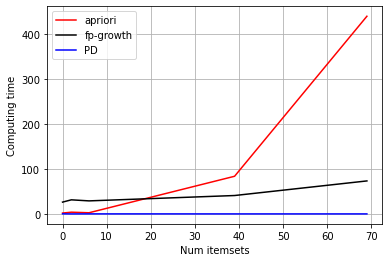

In [24]:
plt.plot(df_performance["num_itemsets"], df_performance["apriori"], c='r', label='apriori')
plt.plot(df_performance["num_itemsets"], df_performance["FP-growth"], c='k', label='fp-growth')
plt.plot(df_performance["num_itemsets"], df_performance["PD"], c='b', label='PD')
plt.xlabel("Num itemsets")
plt.ylabel("Computing time")
plt.grid()
plt.legend()
plt.show()

C:\Users\dgonc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dgonc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dgonc\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


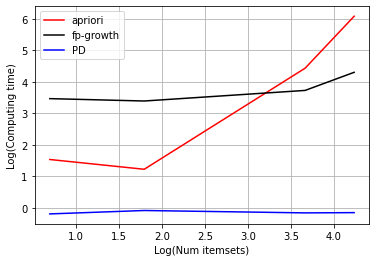

In [25]:
plt.plot(np.log(df_performance["num_itemsets"]), np.log(df_performance["apriori"]), c='r', label='apriori')
plt.plot(np.log(df_performance["num_itemsets"]), np.log(df_performance["FP-growth"]), c='k', label='fp-growth')
plt.plot(np.log(df_performance["num_itemsets"]), np.log(df_performance["PD"]), c='b', label='PD')
plt.xlabel("Log(Num itemsets)")
plt.ylabel("Log(Computing time)")
plt.grid()
plt.legend()
plt.show()

Based on the output and the graphs, the recursive algorithm (PD) performs better than all the other ones. A support threshold of 0.02 may be a good starting point, as it generates a reasonable amount of itemsets (39) with a very short execution time.